In [1]:
import tensorflow
import matplotlib
import seaborn
import numpy
import pandas
import sklearn
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt

print(tensorflow.__version__)
print(matplotlib.__version__)
print(seaborn.__version__)
print(numpy.__version__)
print(pandas.__version__)
print(sklearn.__version__)

2.18.0
3.10.0
0.13.2
2.0.2
2.2.2
1.6.1


## 실험 1: 최빈 5000 단어

In [42]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2)

### 데이터 확인하기

In [43]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [44]:
x_train[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [45]:
num_classes = max(y_train) + 1
print('클래스의 수 : {}'.format(num_classes))

클래스의 수 : 46


훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


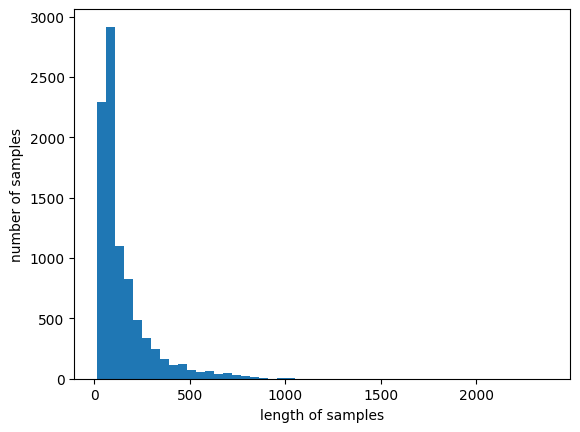

In [46]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [47]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

In [48]:
word_index['the']

1

In [49]:
word_index['it']

13

In [50]:
index_to_word = { index+3 : word for word, index in word_index.items() }

In [51]:
print(index_to_word[4])
print(index_to_word[16])

the
it


In [52]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

In [53]:
# x_train, x_test를 정수 시퀀스에서 텍스트 시퀀스로 변환.
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [54]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

2246


### 벡터화

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [56]:
x_train[0]

'<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [57]:
# [['text']] 형식의 x_train의 dtm 생성
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

# [['text']] 형식의 x_test의 dtm 생성
x_test_dtm = dtmvector.transform(x_test)
print(x_test_dtm.shape)

(8982, 4867)
(2246, 4867)


In [58]:
# x_train의 dtm을 tf-idf로 변환
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

# x_test의 dtm을 tf-idf로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm)
print(tfidfv_test.shape)

(8982, 4867)
(2246, 4867)


### 머신러닝 모델 실험
1. 로지스틱
2. 랜덤 포레스트

In [8]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score #정확도 계산

In [60]:
# LogisticRegression
lr = LogisticRegression()
lr.fit(tfidfv, y_train)

LogisticRegression()

In [63]:
predicted_lr = lr.predict(tfidfv_test)
print("Macro F1:", f1_score(y_test, predicted_lr, average='macro'))
print("Weighted F1:", f1_score(y_test, predicted_lr, average='weighted'))
print("정확도:", accuracy_score(y_test, predicted_lr))

Macro F1: 0.48137960802635543
Weighted F1: 0.776227497939864
정확도: 0.7978628673196795


In [65]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(tfidfv, y_train)

RandomForestClassifier()

In [66]:
predicted_rf = rf.predict(tfidfv_test)
print("Macro F1:", f1_score(y_test, predicted_rf, average='macro'))
print("Weighted F1:", f1_score(y_test, predicted_rf, average='weighted'))
print("정확도:", accuracy_score(y_test, predicted_rf))

Macro F1: 0.4470049145463009
Weighted F1: 0.741814346828474
정확도: 0.7640249332146037


## 실험 2: 최빈 10000단어

In [2]:
def load_data(num_words: int):
  # load data
  (x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=num_words, test_split=0.2)
  word_index = reuters.get_word_index(path="reuters_word_index.json")
  index_to_word = { index+3 : word for word, index in word_index.items() }

  # index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
  for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token

  # x_train, x_test를 정수 시퀀스에서 텍스트 시퀀스로 변환.
  decoded = []
  for i in range(len(x_train)):
      t = ' '.join([index_to_word[index] for index in x_train[i]])
      decoded.append(t)

  x_train = decoded
  print('x_train 길이: ', len(x_train))

  decoded = []
  for i in range(len(x_test)):
      t = ' '.join([index_to_word[index] for index in x_test[i]])
      decoded.append(t)
  x_test = decoded

  return x_train, x_test


In [3]:
def vectorize(x_train, x_test):

  # [['text']] 형식의 x_train의 dtm 생성
  dtmvector = CountVectorizer()
  x_train_dtm = dtmvector.fit_transform(x_train)
  print('x_train_dtm.shape: ', x_train_dtm.shape)

  # [['text']] 형식의 x_test의 dtm 생성
  x_test_dtm = dtmvector.transform(x_test)
  print('x_test_dtm.shape: ', x_test_dtm.shape)

  # x_train의 dtm을 tf-idf로 변환
  tfidf_transformer = TfidfTransformer()
  tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
  print(tfidfv.shape)

  # x_test의 dtm을 tf-idf로 변환
  tfidfv_test = tfidf_transformer.transform(x_test_dtm)
  print(tfidfv_test.shape)

  return tfidfv, tfidfv_test

In [4]:
def predict(tfidfv, y_train, tfidfv_test, y_test):
  # LogisticRegression
  lr = LogisticRegression()
  lr.fit(tfidfv, y_train)

  predicted_lr = lr.predict(tfidfv_test)
  print("LR Macro F1:", f1_score(y_test, predicted_lr, average='macro'))
  print("LR Weighted F1:", f1_score(y_test, predicted_lr, average='weighted'))
  print("LR 정확도:", accuracy_score(y_test, predicted_lr))

  # Random Forest
  rf = RandomForestClassifier()
  rf.fit(tfidfv, y_train)

  predicted_rf = rf.predict(tfidfv_test)
  print("RF Macro F1:", f1_score(y_test, predicted_rf, average='macro'))
  print("RF Weighted F1:", f1_score(y_test, predicted_rf, average='weighted'))
  print("RF 정확도:", accuracy_score(y_test, predicted_rf))

In [5]:
x_train, x_test = load_data(10000)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train 길이:  8982


In [9]:
tfidfv, tfidfv_test = vectorize(x_train, x_test)

x_train_dtm.shape:  (8982, 9670)
x_test_dtm.shape:  (2246, 9670)
(8982, 9670)
(2246, 9670)


In [81]:
predict(tfidfv, y_train, tfidfv_test, y_test)

LR Macro F1: 0.4721138497182076
LR Weighted F1: 0.7732079999734564
LR 정확도: 0.7956366874443455
RF Macro F1: 0.4292114361493533
RF Weighted F1: 0.7294806016847529
RF 정확도: 0.7537845057880677


## 실험 3: 최빈 20000단어

In [82]:
x_train_20000, x_test_20000 = load_data(20000)

x_train 길이:  8982


In [83]:
tfidfv_20000, tfidfv_test_20000 = vectorize(x_train_20000, x_test_20000)

x_train_dtm.shape:  (8982, 18479)
x_test_dtm.shape:  (2246, 18479)
(8982, 18479)
(2246, 18479)


In [84]:
predict(tfidfv_20000, y_train, tfidfv_test_20000, y_test)

LR Macro F1: 0.45156243115316824
LR Weighted F1: 0.7671457192567441
LR 정확도: 0.7916295636687445
RF Macro F1: 0.3793317048984431
RF Weighted F1: 0.7074203451148947
RF 정확도: 0.7355298308103295


## 실험 4: 모든 단어

In [85]:
x_train_non, x_test_non = load_data(num_words=None)

x_train 길이:  8982


In [86]:
tfidfv_non, tfidfv_test_non = vectorize(x_train_non, x_test_non)

x_train_dtm.shape:  (8982, 26506)
x_test_dtm.shape:  (2246, 26506)
(8982, 26506)
(2246, 26506)


In [87]:
predict(tfidfv_non, y_train, tfidfv_test_non, y_test)

LR Macro F1: 0.4513970038601613
LR Weighted F1: 0.7670211296471304
LR 정확도: 0.7916295636687445
RF Macro F1: 0.40658689578538404
RF Weighted F1: 0.7195010449134913
RF 정확도: 0.7457702582368655


## 회고
Logistic Regression이 모든 상황에서 Random Forest Classifier보다 좋은 성능을 보여줬다.

## Deep Learning 모델과의 비교
동일한 데이터셋(num_words = 5000)과 전처리 조건으로 기존 머신러닝 알고리즘을 사용한 모델과 딥러닝 모델의 성능을 비교한다.  


In [10]:
# 데이터셋과 전처리 과정은 동일하게 유지
(x_train_deep, y_train_deep), (x_test_deep, y_test_deep) = reuters.load_data(num_words=5000, test_split=0.2)

In [11]:
print(len(x_train_deep[0]))
print(x_train_deep[0])

87
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [12]:
from tensorflow.keras.utils import pad_sequences

# Pad the sequences to ensure they have the same length
x_train_deep = pad_sequences(x_train_deep, padding='pre')
x_test_deep = pad_sequences(x_test_deep, padding='pre')

In [13]:
print(len(x_train_deep[0]))
print(x_train_deep[0])

2376
[ 0  0  0 ... 15 17 12]


### 딥러닝 모델 생성

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping

basemodel = Sequential()
basemodel.add(Embedding(5000, 128))
basemodel.add(Flatten())
basemodel.add(Dense(46, activation='softmax'))

In [26]:
callback = EarlyStopping(monitor='val_loss',
                         patience=3)

In [27]:
basemodel.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [28]:
basemodel.fit(x_train_deep, y_train_deep,
              epochs=30, batch_size=64,
              callbacks=[callback],
              validation_split=0.2)

Epoch 1/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.1635 - loss: 29.9788 - val_accuracy: 0.0128 - val_loss: 149.2254
Epoch 2/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3049 - loss: 113.8847 - val_accuracy: 0.2577 - val_loss: 108.5834
Epoch 3/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4143 - loss: 80.1858 - val_accuracy: 0.1269 - val_loss: 66.0567
Epoch 4/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4573 - loss: 63.7677 - val_accuracy: 0.5097 - val_loss: 38.1695
Epoch 5/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5605 - loss: 26.7400 - val_accuracy: 0.5893 - val_loss: 15.8270
Epoch 6/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6314 - loss: 13.5290 - val_accuracy: 0.6522 - val_loss: 7.5512
Epoch 7/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7340 - loss: 4.8836 - val_accuracy: 0.4263 - val_loss: 11.7083
Epoch 8/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7367 - loss: 5.

In [36]:
# 퍼포먼스 그래프 플롯 함수화
import matplotlib.pyplot as plt

def plot_history(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()


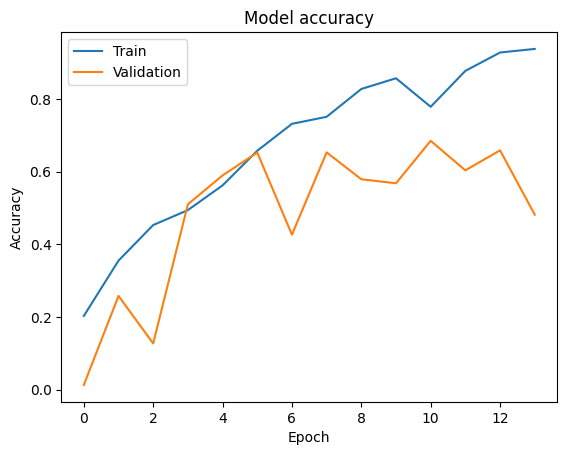

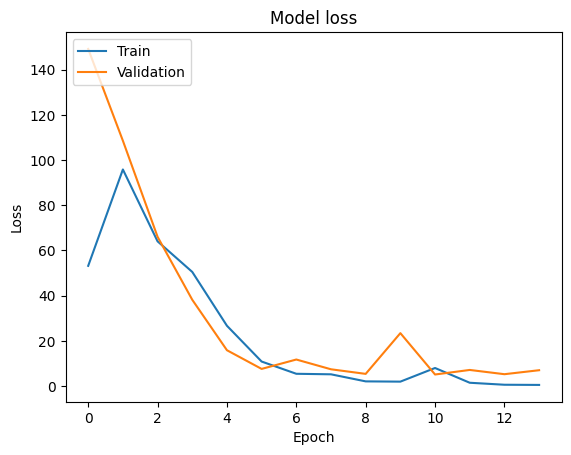

In [37]:
# basemodel 퍼포먼스

plot_history(basemodel.history)

대략 epoch 5부터 과적합이 시작됨.  
val_accuracy: 0.6522 이후로 과적합 시작.

In [33]:
# basemodel hidden layer에 lstm 추가

model = Sequential()
model.add(Embedding(5000, 128))
model.add(LSTM(128))
model.add(Dense(46, activation='softmax'))

In [34]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
model.fit(x_train_deep, y_train_deep,
          epochs=30, batch_size=64,
          callbacks=[callback], validation_split=0.2)


Epoch 1/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 17s 135ms/step - accuracy: 0.3354 - loss: 2.7976 - val_accuracy: 0.4891 - val_loss: 2.0363
Epoch 2/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 14s 122ms/step - accuracy: 0.4797 - loss: 2.1433 - val_accuracy: 0.4613 - val_loss: 2.0146
Epoch 3/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 19s 111ms/step - accuracy: 0.5123 - loss: 1.8880 - val_accuracy: 0.5070 - val_loss: 1.9514
Epoch 4/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 24s 140ms/step - accuracy: 0.5273 - loss: 1.8329 - val_accuracy: 0.5710 - val_loss: 1.6837
Epoch 5/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 19s 128ms/step - accuracy: 0.5889 - loss: 1.6152 - val_accuracy: 0.5648 - val_loss: 1.7252
Epoch 6/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 19s 118ms/step - accuracy: 0.5983 - loss: 1.5800 - val_accuracy: 0.5904 - val_loss: 1.6371
Epoch 7/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 20s 112ms/step - accuracy: 0.6289 - loss: 1.4057 - val_accuracy: 0.6494 - val_loss: 1.4581
Epoch 8/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 113ms/step - accuracy: 0.6930 - loss: 1

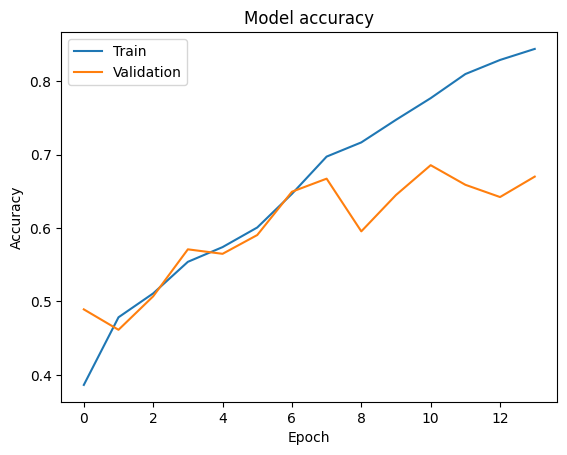

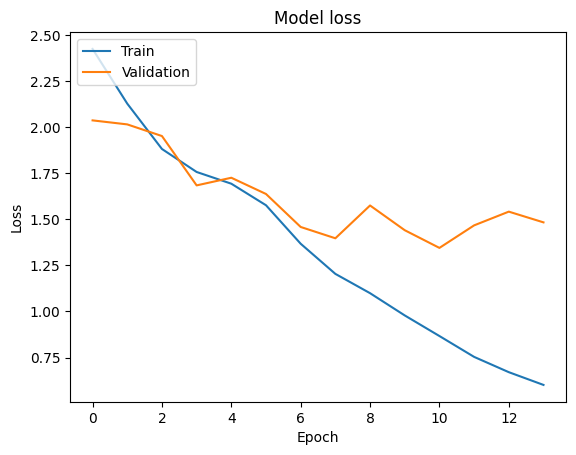

In [38]:
plot_history(model.history)

val_accuracy: 0.65 이후로 과적합.  
basemodel과 비교했을 때 차이가 없다.  
따라서 lstm layer를 추가하는 것은 totes useless.

In [39]:
# basemodel에 Dense layer만 추가

base_dense = Sequential()
base_dense.add(Embedding(5000, 128))
base_dense.add(Flatten())
base_dense.add(Dense(1024))
base_dense.add(Dense(256))
base_dense.add(Dense(46, activation='softmax'))

In [40]:
base_dense.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

base_dense.fit(x_train_deep, y_train_deep,
              epochs=30, batch_size=64,
              callbacks=[callback],
              validation_split=0.2)

Epoch 1/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 37s 135ms/step - accuracy: 0.1765 - loss: 373.3020 - val_accuracy: 0.0367 - val_loss: 692.0536
Epoch 2/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - accuracy: 0.3067 - loss: 391.7699 - val_accuracy: 0.3083 - val_loss: 171.8095
Epoch 3/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.4772 - loss: 89.6700 - val_accuracy: 0.5075 - val_loss: 26.7491
Epoch 4/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - accuracy: 0.5539 - loss: 17.8202 - val_accuracy: 0.5665 - val_loss: 12.5072
Epoch 5/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 20s 88ms/step - accuracy: 0.6011 - loss: 9.9635 - val_accuracy: 0.6066 - val_loss: 5.6788
Epoch 6/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - accuracy: 0.7934 - loss: 1.6360 - val_accuracy: 0.6060 - val_loss: 4.9321
Epoch 7/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 11s 91ms/step - accuracy: 0.7751 - loss: 1.8771 - val_accuracy: 0.4719 - val_loss: 6.7806
Epoch 8/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 20s 88ms/step - accuracy: 0.8735 - lo

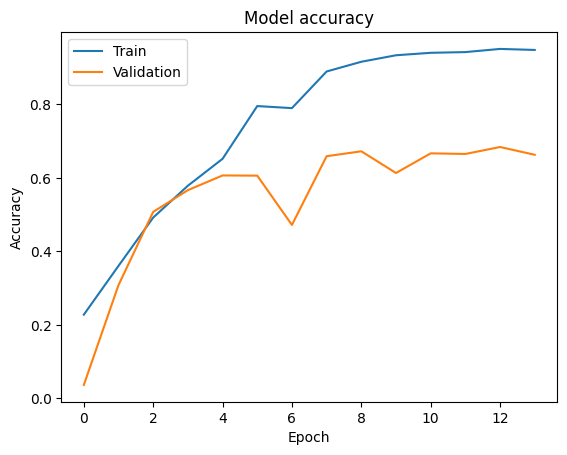

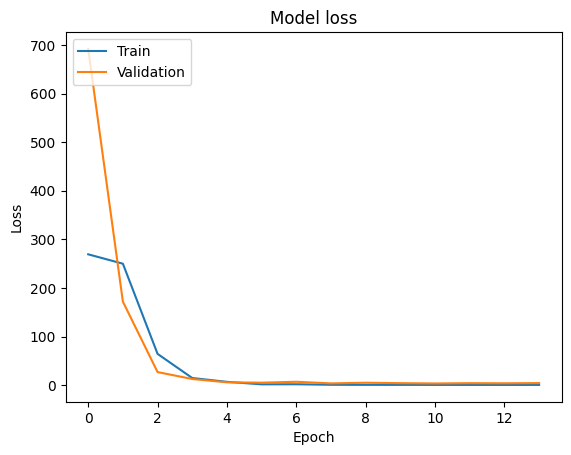

In [41]:
plot_history(base_dense.history)

0.6066 이후부터 과적합 진행